In [2]:
print("Hello World")

#implement algorithms
#plotting
#markdown texts and explanation
#extras for A

Hello World

In [3]:
#Newton-Raphson function
function newtonRaphson(f::Function,fprime::Function,xin,tol,N)
    n=1
    x=0.
    x_values = Float64[xin]
    while n<=N
        x=xin-f(xin)/fprime(xin)
        if f(x)==0 || abs(x-xin)<tol
            println("x is $x and the iteration number is $n")
            return x_values
        end
        push!(x_values,x)
        xin=x
        n=n+1
    end
    y=f(x)
    println("Method did not converge. The last iteration gives $x with
        function value $y")
    return x_values
end




newtonRaphson (generic function with 1 method)

In [4]:
#Declaration of given and solving using Newton-Raphson
x_values=Float64[]

f(x) = x.^5 + 2*x.^3 - 5*x .- 2
fprime(x) = 5x.^4+6x.^2-5

x_values=newtonRaphson(f,fprime,1,10^(-4.),20)
foreach(x -> println("x = $x"), x_values)

x is 1.3196411672093729 and the iteration number is 6
x = 1.0
x = 1.6666666666666665
x = 1.432104832104832
x = 1.3354960932923996
x = 1.3200078757043952
x = 1.3196413686678512


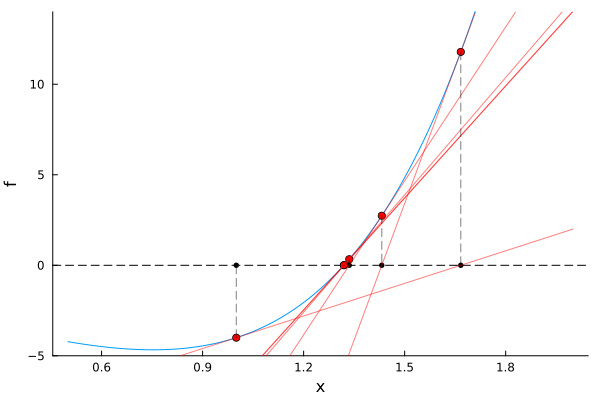

In [26]:
#plotting the given f(x) and visualization of root-finding

using Plots
opacity_control = 3
array_size=length(x_values)

y_values=Float64[]

y_zeros = zeros(array_size)

for x in x_values
    push!(y_values, f(x))
end

x = range(0.5, 2, length=1000)

y = f.(x)

Plots.plot(x, y, ylims=(-5, 14), legend=false, grid=false, xlabel="x", ylabel="f")
hline!([0], color=:black, linestyle=:dash, label="y=0")

scatter!(x_values, y_zeros, label=false, color=:black, markersize=3)

scatter!(x_values, y_values, label=false, color=:red, markersize=4)

for x_point in x_values
    alpha = opacity_control/array_size
    tangent_line(x) = fprime(x_point) * (x - x_point) + f(x_point)
    plot!(x, tangent_line, label=false, linestyle=:solid, color=:red, alpha=alpha)
end

for x_point in x_values
    plot!([x_point, x_point], [f(x_point), 0], label=nothing, linestyle=:dash, color=:black, alpha = 0.5)
end

current()

